In [7]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, RFECV, mutual_info_classif, mutual_info_regression, SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
import sys
import cv2 as cv

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn


import warnings; warnings.simplefilter('ignore')

%matplotlib inline


In [8]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# Data Preprocessing
Introduce the Data¶

Task: Given EEG series, predict wheiter they have Epileptic-Seizure or not

In [9]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Binary Classification

In [10]:
cols = df.columns
outcome = df.y
outcome[outcome>1]=0
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


Outcome Plot

O número de testes para a classe sem crises é: 9200
O número de testes para a classe com crises é: 2300


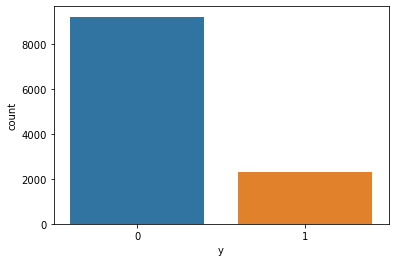

In [11]:
ax = sn.countplot(outcome,label="Count")
non_seizure, seizure = outcome.value_counts()
print('O número de testes para a classe sem crises é:', non_seizure)
print('O número de testes para a classe com crises é:', seizure)

Pandas Indexation

In [12]:
X = df.iloc[:,1:179].values
X.shape

(11500, 178)

In [13]:
y = df.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Feature election and model building

   ## Splitting the dataset into the Training set and Test set

In [14]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [15]:
#Classificadores
modelos = []
modelos.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
modelos.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
modelos.append(('K-Nearest Neighbors', KNeighborsClassifier()))
modelos.append(('Classification and Regression Trees', DecisionTreeClassifier()))
modelos.append(('Gaussian Naive Bayes', GaussianNB()))
modelos.append(('Linear Support Vector Machines', svm.LinearSVC()))
modelos.append(('Extra Trees Classifier',ExtraTreesClassifier()))

In [16]:
resultados = []
nomes = []
for nome, modelo in modelos:
	resultado_validacao_cruzada = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring='accuracy')
	resultados.append(resultado_validacao_cruzada)
	nomes.append(nome)
	print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.823092 (0.004722)
Linear Discriminant Analysis: 0.822609 (0.005503)
K-Nearest Neighbors: 0.923865 (0.006747)
Classification and Regression Trees: 0.936232 (0.005972)
Gaussian Naive Bayes: 0.958261 (0.006593)
Linear Support Vector Machines: 0.834493 (0.010161)
Extra Trees Classifier: 0.972657 (0.004512)


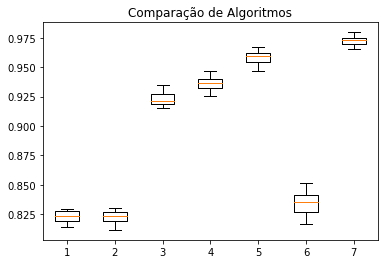

In [17]:
box1 = plt.boxplot(resultados)
plt.title('Comparação de Algoritmos')
plt.show()

In [18]:
predicao = []
for nome, modelo in modelos:
    modelo.fit(X_train,y_train)
    predicao.append(modelo.predict(X_test))

In [19]:
for i in range(len(predicao)):
    print(nomes[i])
    print(accuracy_score(y_test,predicao[i]))
    print(confusion_matrix(y_test,predicao[i]))
    print(classification_report(y_test,predicao[i]))

Logistic Regression
0.8217391304347826
[[918   2]
 [203  27]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       920
           1       0.93      0.12      0.21       230

    accuracy                           0.82      1150
   macro avg       0.87      0.56      0.55      1150
weighted avg       0.84      0.82      0.76      1150

Linear Discriminant Analysis
0.8217391304347826
[[918   2]
 [203  27]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       920
           1       0.93      0.12      0.21       230

    accuracy                           0.82      1150
   macro avg       0.87      0.56      0.55      1150
weighted avg       0.84      0.82      0.76      1150

K-Nearest Neighbors
0.9295652173913044
[[919   1]
 [ 80 150]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       920
           1       0.99      0.65      0.7

# Metodo com sklearn preprocessing

In [20]:
from sklearn import preprocessing

In [21]:
xteste = preprocessing.scale(X)

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(xteste, y, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [23]:
resultados2 = []
nomes2 = []
for nome, modelo in modelos:
    resultado_validacao_cruzada = cross_val_score(modelo, X_train2, y_train2, cv=kfold, scoring='accuracy')
    resultados2.append(resultado_validacao_cruzada)
    nomes2.append(nome)
    print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.817391 (0.003319)
Linear Discriminant Analysis: 0.821063 (0.004885)
K-Nearest Neighbors: 0.923865 (0.008058)
Classification and Regression Trees: 0.934106 (0.005729)
Gaussian Naive Bayes: 0.957198 (0.004734)
Linear Support Vector Machines: 0.817874 (0.004777)
Extra Trees Classifier: 0.972464 (0.003723)


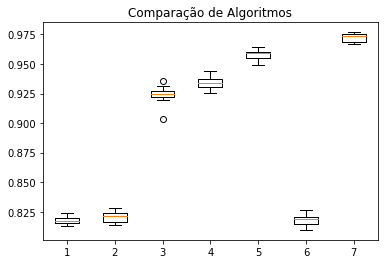

In [24]:
plt.boxplot(resultados2)
plt.title('Comparação de Algoritmos')
plt.show()

In [25]:
predicao2 = []
for nome, modelo in modelos:
    modelo.fit(X_train2,y_train2)
    predicao2.append(modelo.predict(X_test2))

In [26]:
for i in range(len(predicao2)):
    print(nomes2[i])
    print(accuracy_score(y_test2,predicao2[i]))
    print(confusion_matrix(y_test2,predicao2[i]))
    print(classification_report(y_test2,predicao2[i]))

Logistic Regression
0.8156521739130435
[[922   0]
 [212  16]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       922
           1       1.00      0.07      0.13       228

    accuracy                           0.82      1150
   macro avg       0.91      0.54      0.51      1150
weighted avg       0.85      0.82      0.75      1150

Linear Discriminant Analysis
0.82
[[920   2]
 [205  23]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       922
           1       0.92      0.10      0.18       228

    accuracy                           0.82      1150
   macro avg       0.87      0.55      0.54      1150
weighted avg       0.84      0.82      0.76      1150

K-Nearest Neighbors
0.9234782608695652
[[921   1]
 [ 87 141]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       922
           1       0.99      0.62      0.76       228

 

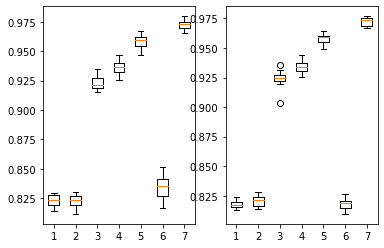

In [27]:
fig, (ax1,ax2) = plt.subplots(1, 2);
ax1.boxplot(resultados);
ax2.boxplot(resultados2);

# Metodo SmoteTomek

In [28]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)


In [29]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_smt, y_smt, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [30]:
resultados3 = []
nomes3 = []
for nome, modelo in modelos:
    resultado_validacao_cruzada = cross_val_score(modelo, X_train3, y_train3, cv=kfold, scoring='accuracy')
    resultados3.append(resultado_validacao_cruzada)
    nomes3.append(nome)
    print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.624879 (0.010385)
Linear Discriminant Analysis: 0.626993 (0.010823)
K-Nearest Neighbors: 0.987198 (0.001547)
Classification and Regression Trees: 0.925060 (0.007908)
Gaussian Naive Bayes: 0.898490 (0.008229)
Linear Support Vector Machines: 0.631220 (0.016863)
Extra Trees Classifier: 0.985085 (0.002340)


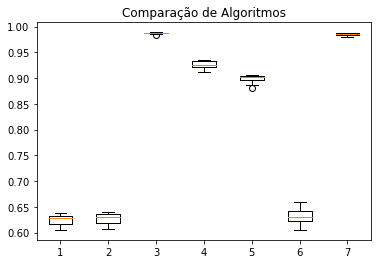

In [31]:
plt.boxplot(resultados3)
plt.title('Comparação de Algoritmos')
plt.show()

In [32]:
predicao3 = []
for nome, modelo in modelos:
    modelo.fit(X_train3,y_train3)
    predicao3.append(modelo.predict(X_test3))

In [33]:
for i in range(len(predicao3)):
    print(nomes3[i])
    print(accuracy_score(y_test3,predicao3[i]))
    print(confusion_matrix(y_test3,predicao3[i]))
    print(classification_report(y_test3,predicao3[i]))

Logistic Regression
0.6179347826086956
[[666 283]
 [420 471]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       949
           1       0.62      0.53      0.57       891

    accuracy                           0.62      1840
   macro avg       0.62      0.62      0.61      1840
weighted avg       0.62      0.62      0.61      1840

Linear Discriminant Analysis
0.6201086956521739
[[691 258]
 [441 450]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       949
           1       0.64      0.51      0.56       891

    accuracy                           0.62      1840
   macro avg       0.62      0.62      0.61      1840
weighted avg       0.62      0.62      0.62      1840

K-Nearest Neighbors
0.9918478260869565
[[945   4]
 [ 11 880]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       1.00      0.99      0.9

Aplicação Metodo no dataset original

In [34]:
predicao4 = []
for nome, modelo in modelos:
    modelo.fit(X_train3,y_train3)
    predicao4.append(modelo.predict(X_test))

In [35]:
for i in range(len(predicao4)):
    print(nomes3[i])
    print(accuracy_score(y_test,predicao4[i]))
    print(confusion_matrix(y_test,predicao4[i]))
    print(classification_report(y_test,predicao4[i]))

Logistic Regression
0.697391304347826
[[677 243]
 [105 125]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       920
           1       0.34      0.54      0.42       230

    accuracy                           0.70      1150
   macro avg       0.60      0.64      0.61      1150
weighted avg       0.76      0.70      0.72      1150

Linear Discriminant Analysis
0.7139130434782609
[[699 221]
 [108 122]]
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       920
           1       0.36      0.53      0.43       230

    accuracy                           0.71      1150
   macro avg       0.61      0.65      0.62      1150
weighted avg       0.76      0.71      0.73      1150

K-Nearest Neighbors
0.9939130434782608
[[914   6]
 [  1 229]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       920
           1       0.97      1.00      0.98

Confusion matrix:
 [[918   2]
 [  0 230]]


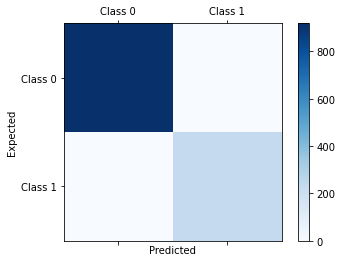

In [36]:
conf_mat = confusion_matrix(y_test,predicao4[i])
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [37]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

# Metodo RandomUnderSampler

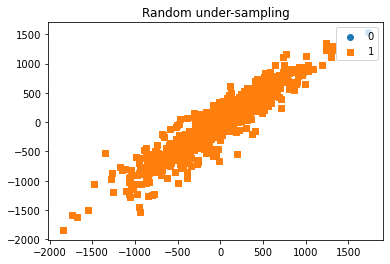

In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority')

X_rus, y_rus = rus.fit_sample(X, y)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

The number of trials for the non-seizure class is: 2300
The number of trials for the seizure class is: 2300


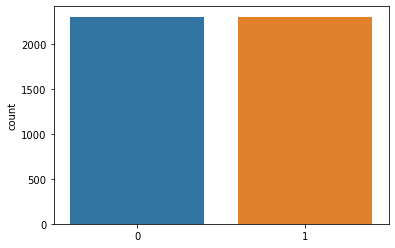

In [40]:
axn = sn.countplot(y_rus,label="Count")
non_seizure = list(y_rus).count(0)
seizure = list(y_rus).count(1)
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [43]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_rus, y_rus, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [44]:
resultados5 = []
nomes5 = []
for nome, modelo in modelos:
    resultado_validacao_cruzada = cross_val_score(modelo, X_train5, y_train5, cv=kfold, scoring='accuracy')
    resultados5.append(resultado_validacao_cruzada)
    nomes5.append(nome)
    print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.575362 (0.018641)
Linear Discriminant Analysis: 0.579469 (0.011707)
K-Nearest Neighbors: 0.854831 (0.012938)
Classification and Regression Trees: 0.893720 (0.013578)
Gaussian Naive Bayes: 0.931643 (0.005922)
Linear Support Vector Machines: 0.637440 (0.012479)
Extra Trees Classifier: 0.967391 (0.008792)


In [45]:
predicao5 = []
for nome, modelo in modelos:
    modelo.fit(X_train5,y_train5)
    predicao5.append(modelo.predict(X_test5))

In [46]:
for i in range(len(predicao5)):
    print(nomes5[i])
    print(accuracy_score(y_test5,predicao5[i]))
    print(confusion_matrix(y_test5,predicao5[i]))
    print(classification_report(y_test5,predicao5[i]))

Logistic Regression
0.6086956521739131
[[162  61]
 [119 118]]
              precision    recall  f1-score   support

           0       0.58      0.73      0.64       223
           1       0.66      0.50      0.57       237

    accuracy                           0.61       460
   macro avg       0.62      0.61      0.61       460
weighted avg       0.62      0.61      0.60       460

Linear Discriminant Analysis
0.6130434782608696
[[170  53]
 [125 112]]
              precision    recall  f1-score   support

           0       0.58      0.76      0.66       223
           1       0.68      0.47      0.56       237

    accuracy                           0.61       460
   macro avg       0.63      0.62      0.61       460
weighted avg       0.63      0.61      0.61       460

K-Nearest Neighbors
0.8717391304347826
[[223   0]
 [ 59 178]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       223
           1       1.00      0.75      0.8

# Metodo Tomeklink

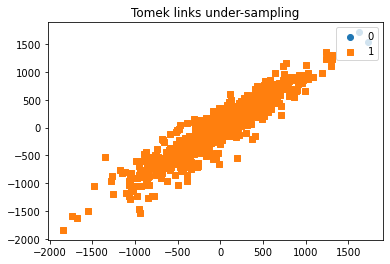

In [42]:
from matplotlib import pyplot as plt
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='auto')
X_tl, y_tl = tl.fit_sample(X, y)

plot_2d_space(X_tl,y_tl, 'Tomek links under-sampling')

In [47]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_tl, y_tl, test_size = 0.1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

In [48]:
resultados6 = []
nomes6 = []
for nome, modelo in modelos:
    resultado_validacao_cruzada = cross_val_score(modelo, X_train6, y_train6, cv=kfold, scoring='accuracy')
    resultados6.append(resultado_validacao_cruzada)
    nomes6.append(nome)
    print('%s: %f (%f)' % (nome, resultado_validacao_cruzada.mean(), resultado_validacao_cruzada.std()))

Logistic Regression: 0.823847 (0.003220)
Linear Discriminant Analysis: 0.821335 (0.003545)
K-Nearest Neighbors: 0.923664 (0.005598)
Classification and Regression Trees: 0.939802 (0.007915)
Gaussian Naive Bayes: 0.956615 (0.007373)
Linear Support Vector Machines: 0.838824 (0.005621)
Extra Trees Classifier: 0.972655 (0.005308)


In [49]:
predicao6 = []
for nome, modelo in modelos:
    modelo.fit(X_train6,y_train6)
    predicao6.append(modelo.predict(X_test6))

In [50]:
for i in range(len(predicao6)):
    print(nomes6[i])
    print(accuracy_score(y_test6,predicao6[i]))
    print(confusion_matrix(y_test6,predicao6[i]))
    print(classification_report(y_test6,predicao6[i]))

Logistic Regression
0.8269565217391305
[[922   5]
 [194  29]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       927
           1       0.85      0.13      0.23       223

    accuracy                           0.83      1150
   macro avg       0.84      0.56      0.56      1150
weighted avg       0.83      0.83      0.77      1150

Linear Discriminant Analysis
0.8260869565217391
[[925   2]
 [198  25]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       927
           1       0.93      0.11      0.20       223

    accuracy                           0.83      1150
   macro avg       0.87      0.55      0.55      1150
weighted avg       0.84      0.83      0.77      1150

K-Nearest Neighbors
0.9321739130434783
[[926   1]
 [ 77 146]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       927
           1       0.99      0.65      0.7

# Predição final

In [56]:
modelofinal = ExtraTreesClassifier().fit(X_train3,y_train3)
predicaofinal = modelofinal.predict(X)
print(accuracy_score(y,predicaofinal))
print(confusion_matrix(y,predicaofinal))
print(classification_report(y,predicaofinal))

0.9792173913043478
[[8970  230]
 [   9 2291]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      9200
           1       0.91      1.00      0.95      2300

    accuracy                           0.98     11500
   macro avg       0.95      0.99      0.97     11500
weighted avg       0.98      0.98      0.98     11500



Confusion matrix:
 [[8970  230]
 [   9 2291]]


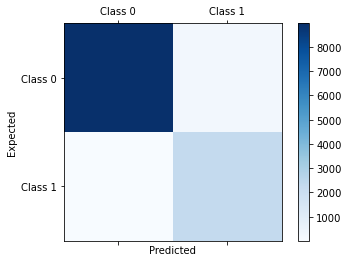

In [57]:
conf_mat = confusion_matrix(y,predicaofinal)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()